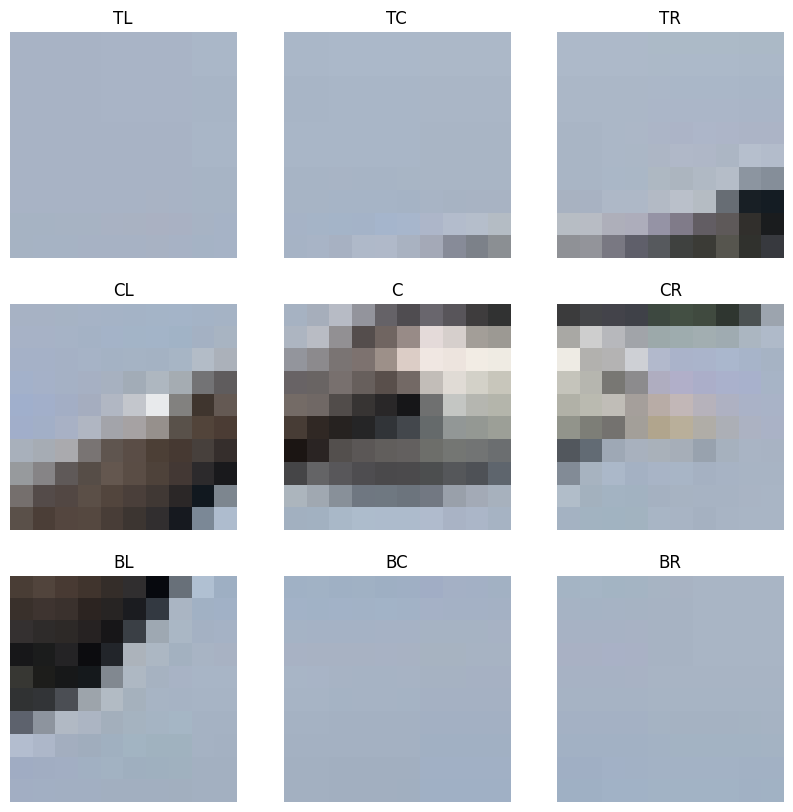

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def make_square(image_path, output_size=(300, 300)):
    """
    Open an image file and convert it into a square image of the specified size.
    """
    with Image.open(image_path) as img:
        # Resize image maintaining aspect ratio
        img.thumbnail(output_size, Image.Resampling.LANCZOS)
        
        # Create a new square background image
        square_img = Image.new("RGB", output_size, (32, 32, 32))
        # Calculate coordinates to paste the input image onto the center of the background
        x = (output_size[0] - img.size[0]) // 2
        y = (output_size[1] - img.size[1]) // 2
        square_img.paste(img, (x, y))
        return square_img

def cut_into_tiles(image, num_tiles=9):
    """
    Cut the square image into num_tiles pieces (default is 9 for a 3x3 grid).
    Returns a dictionary of Image objects representing each tile with their position as keys.
    """
    if num_tiles != 9:
        raise ValueError("This function currently supports only 9 tiles.")
    
    tiles = {}
    width, height = image.size
    tile_width = width // 3
    tile_height = height // 3
    
    positions = ['tl', 'tc', 'tr', 'cl', 'c', 'cr', 'bl', 'bc', 'br'] # Top-Left, Top-Center, ..., Bottom-Right
    
    for i in range(3):  # For each row
        for j in range(3):  # For each column
            left = j * tile_width
            upper = i * tile_height
            right = left + tile_width
            lower = upper + tile_height
            tile = image.crop((left, upper, right, lower))
            tiles[positions.pop(0)] = tile
    return tiles

# Example usage
image_path = "test_image2.jpeg"  # Update this path with an existing image path
output_size = (32, 32)  # You can adjust this based on your model input size

square_img = make_square(image_path, output_size)
tiles = cut_into_tiles(square_img)

# Display the cropped images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
positions = [['tl', 'tc', 'tr'], ['cl', 'c', 'cr'], ['bl', 'bc', 'br']]

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(tiles[positions[i][j]])
        axs[i, j].axis('off')
        axs[i, j].set_title(positions[i][j].upper())

plt.show()


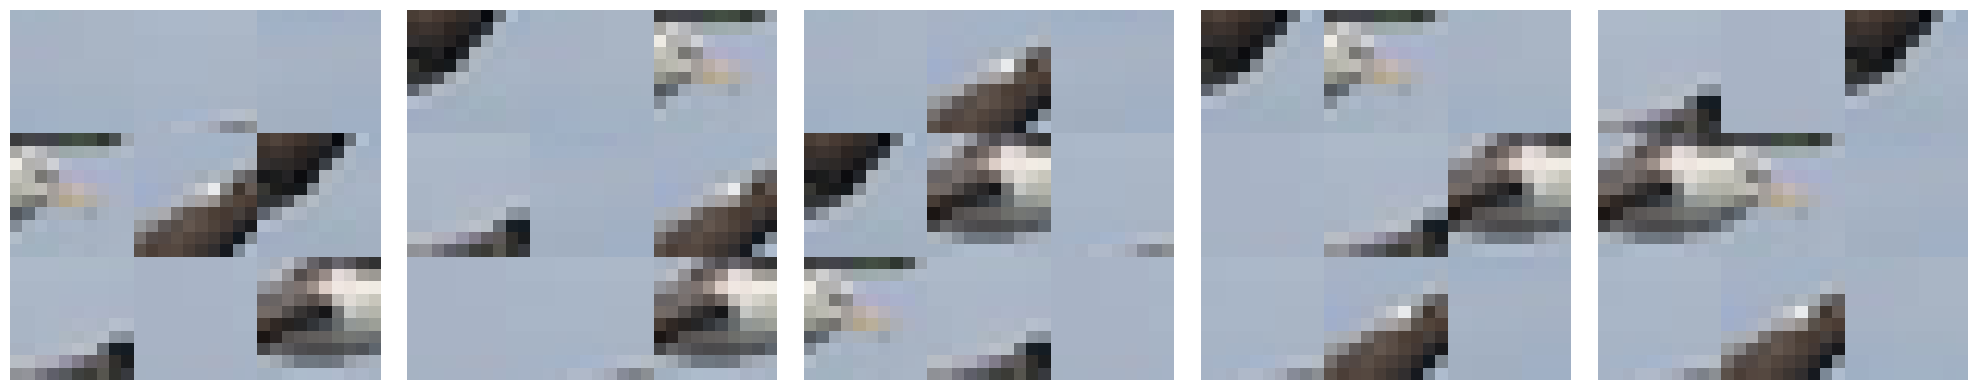

In [3]:
import random

def create_permuted_images(tiles, n):
    """
    Create 'n' permuted images out of the 9 tiles.
    Returns a list of permuted Image objects.
    """
    permuted_images = []
    tile_positions = list(tiles.keys())
    original_size = tiles['tl'].size[0] * 3  # Assuming all tiles are the same size and square
    
    for _ in range(n):
        # Shuffle the positions
        random.shuffle(tile_positions)
        # Create a new empty image to paste the tiles
        new_img = Image.new('RGB', (original_size, original_size))
        for i, pos in enumerate(tile_positions):
            # Calculate the position in the grid
            x = (i % 3) * tiles['tl'].size[0]
            y = (i // 3) * tiles['tl'].size[1]
            # Paste the tile in the new image
            new_img.paste(tiles[pos], (x, y))
        permuted_images.append(new_img)
        
    return permuted_images

# Create 5 permuted images (n=5) for demonstration
permuted_images = create_permuted_images(tiles, 5)

# Display the permuted images
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, img in enumerate(permuted_images):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.tight_layout()
plt.show()
